# **Make moons Binary Classfication project**

In this notebook, I will use the knowledge that I have gathered in the make circles dataset to make a classification neural network on the make_moons dataset.

The problem at hand is a binary classification. This is to practice what I have learnt and test to see if I grasped the concepts of neural network classifications

In [45]:
# import make_moons dataset from sklearn
from sklearn.datasets import make_moons

# Make 1000 samples
X,y = make_moons(n_samples=1000,
                 random_state=42,
                 noise=0.03) # using the same same nois as in make_circles

In [46]:
# Check the features
X

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [47]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [48]:
# Visualize the data to see what's happening
import pandas as pd
moons = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label": y})
moons.head()

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


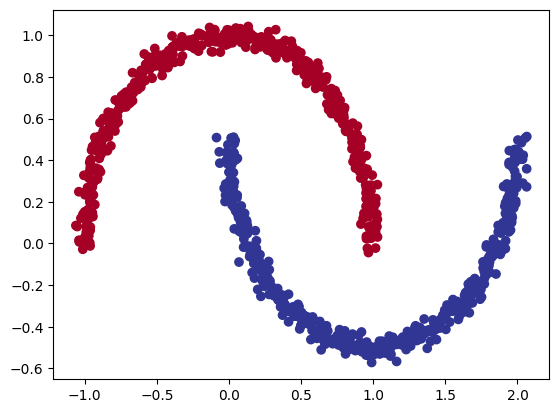

In [49]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [50]:
# Check the input and output shapes
X.shape, y.shape


((1000, 2), (1000,))

In [51]:
# Check the len
len(X), len(y)

(1000, 1000)

In [52]:
# Check the first inputs
X[0], y[0]

(array([-0.00933187,  0.39098105]), 1)

# Modeling

In [53]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [54]:
# Split the data  into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
# Creating a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 1.2756 - accuracy: 0.8200
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8149 - accuracy: 0.8712
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 2.7432 - accuracy: 0.6587
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 1.6382 - accuracy: 0.8100
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7786 - accuracy: 0.8625
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2812 - accuracy: 0.8788
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8469 - accuracy: 0.8263
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.8338
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2338 - accuracy: 0.8662
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 0.8750
Epoch 11/

In [56]:
model_1.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.8875


[0.22226619720458984, 0.887499988079071]

The model performs slightly at 50%. It's basically just guessing.

# Visualize the model

In [57]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 847us/step
doing binary classifcation...


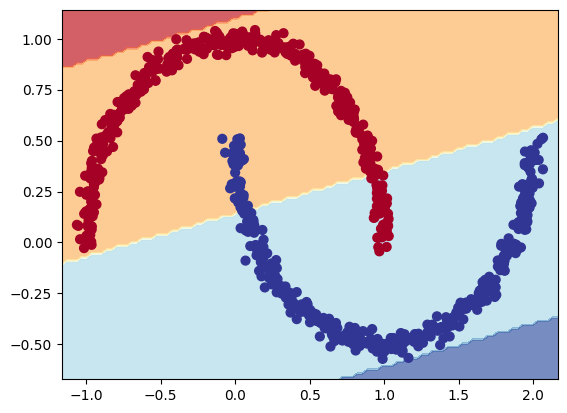

In [58]:
plot_decision_boundary(model_1, X_train, y_train)

The model performs poorly since the data is in circular  format. To fix this, I'll introduce non-linearity function to the model

## Building the model with non linear activation function

Exprimenting with swish instead of the the popular 'relu'---



In [59]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='elu'), # elu for exponential linear unit
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(X_train,y_train, epochs=100, verbose=0)

In [60]:
model_2.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.8975


[0.2414056658744812, 0.8974999785423279]

The model now seems to be learning. The model now performs at 90% accuracy. How did I improve the model?
* Adding the number of hidden networks
* Using activation functions:
> `relu` for inputs and `sigmoid` outputs
* Training for longer

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


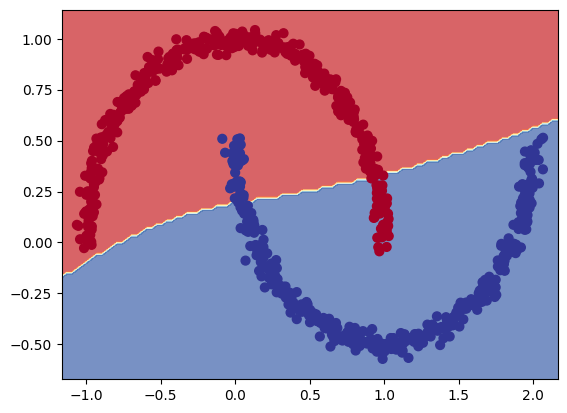

In [61]:
# See how the model trains
plot_decision_boundary(model_2, X_train, y_train)

313/313 [==============================] - 0s 905us/step
doing binary classifcation...
313/313 [==============================] - 0s 839us/step
doing binary classifcation...


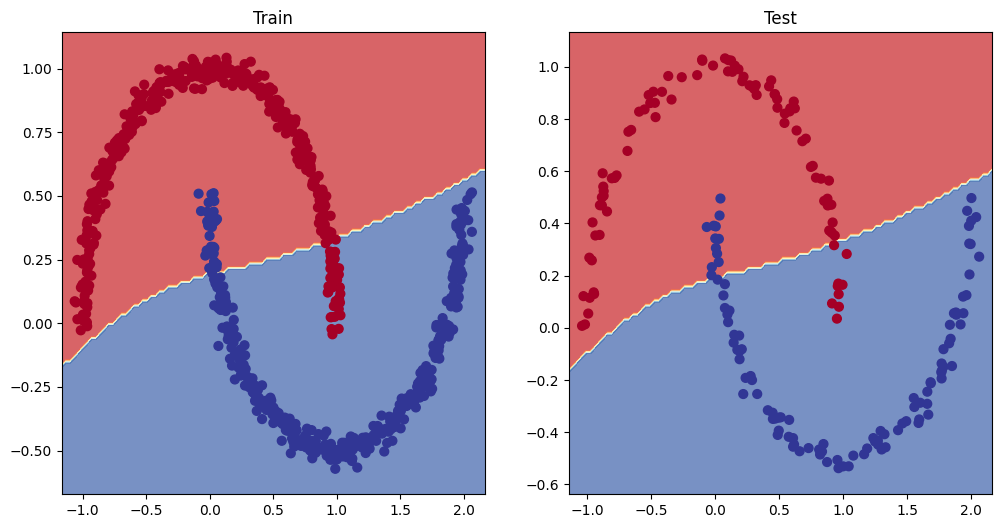

In [62]:
# Plot the decision boundary
plt.figure(figsize=(12,6));
plt.subplot(1,2,1);
plt.title("Train");
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

In [63]:
# Plot the loss curve
history_2.history

{'loss': [0.6431958079338074,
  0.6149393320083618,
  0.5892041921615601,
  0.5652319192886353,
  0.5426549315452576,
  0.5213026404380798,
  0.5012638568878174,
  0.4826529324054718,
  0.465529203414917,
  0.4497602581977844,
  0.4354887306690216,
  0.42264094948768616,
  0.41114386916160583,
  0.40072110295295715,
  0.39141133427619934,
  0.38288453221321106,
  0.37525030970573425,
  0.3682858645915985,
  0.3619230389595032,
  0.35613468289375305,
  0.3506203889846802,
  0.3456180989742279,
  0.34080612659454346,
  0.33639761805534363,
  0.33215877413749695,
  0.3282642066478729,
  0.32446709275245667,
  0.32089734077453613,
  0.3175387978553772,
  0.31422364711761475,
  0.31112393736839294,
  0.30815035104751587,
  0.3052947521209717,
  0.30260640382766724,
  0.2999544143676758,
  0.2974478602409363,
  0.2950197160243988,
  0.292673259973526,
  0.2905271351337433,
  0.2883693277835846,
  0.28633204102516174,
  0.28441619873046875,
  0.28256338834762573,
  0.2808327376842499,
  0.279

In [64]:
# Converting the history object into a DataFrame
import pandas as pd
pd.DataFrame(history_2.history)

,loss,accuracy
0,0.643196,0.70500
1,0.614939,0.86250
2,0.589204,0.87625
3,0.565232,0.84750
4,0.542655,0.84125
...,...,...
95,0.243341,0.89625
96,0.242916,0.89750
97,0.242655,0.89750
98,0.242247,0.89875


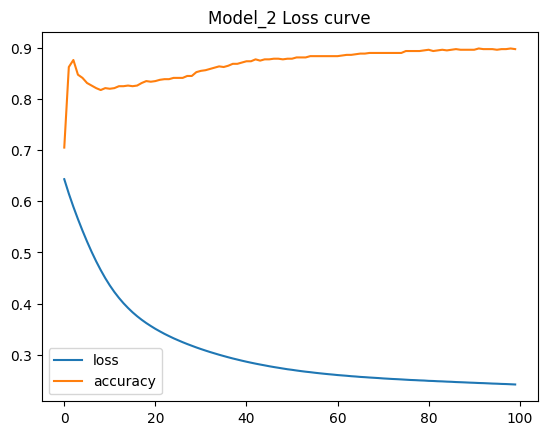

In [65]:
# plot the loss curve
pd.DataFrame(history_2.history).plot()
plt.title("Model_2 Loss curve");

# Finding the best learning rate

In [66]:
# To find the best learning rate, I need to first set up  a learning rate callback

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Set the learning rate schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=lr_schedular)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5934 - accuracy: 0.7212 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.7200 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7175 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.7163 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5899 - accuracy: 0.7175 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.7175 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.7163 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.7163 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

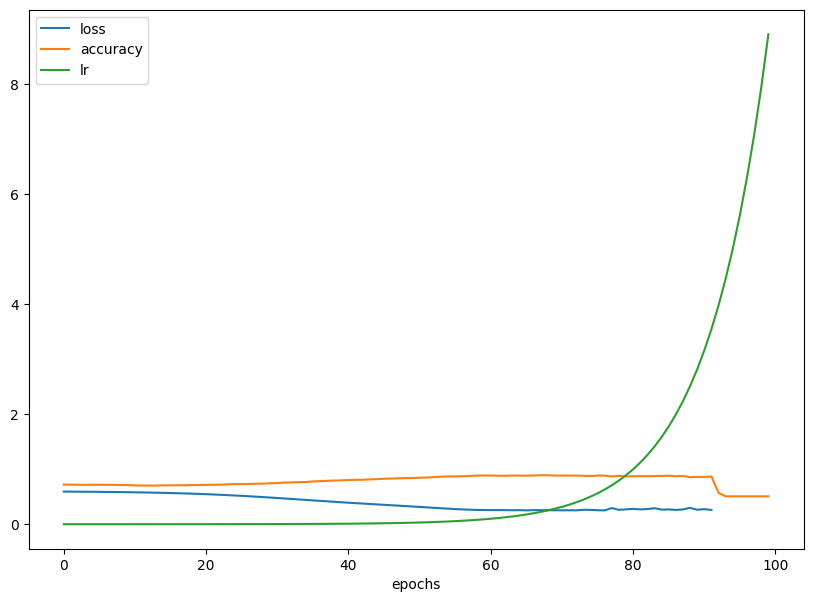

In [67]:

# Check out the history
pd.DataFrame(history_3.history).plot(figsize=(10,7), xlabel='epochs');

The learning rate increa ses as the number of epochs increases.The accuracy increases in while The loss decreases steadily and the suddenly spikes horizontall.

Could this be because of using`elu` instead of `relu`. Perform experiment and visualize the difference

In [68]:
# Using relu instead of elu
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.6100
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.7588
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.8612
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.8763
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5920 - accuracy: 0.8813
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.8800
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.8763
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.8725
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.8712
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.8700
Epoch 11/

The results above prove that the model is guessing

In [69]:
model_4.evaluate(X_train,y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.8975


[0.21981437504291534, 0.8974999785423279]

### Improving the model
* Use the Adam optimizer

In [70]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7893 - accuracy: 0.3525
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7670 - accuracy: 0.3187
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7496 - accuracy: 0.3137
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7346 - accuracy: 0.3288
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.3600
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.3650
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.3725
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.3913
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.4125
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.4313
Epoch 11/

By Changing the optimizer the model acquires a much higher accuracy

In [71]:
model_5.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9575


[0.13067938387393951, 0.9574999809265137]

313/313 [==============================] - 0s 847us/step
doing binary classifcation...


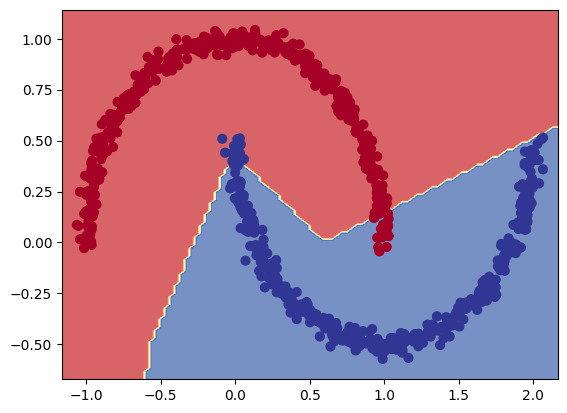

In [72]:
plot_decision_boundary(model_5, X_train, y_train)

313/313 [==============================] - 0s 860us/step
doing binary classifcation...
313/313 [==============================] - 0s 844us/step
doing binary classifcation...


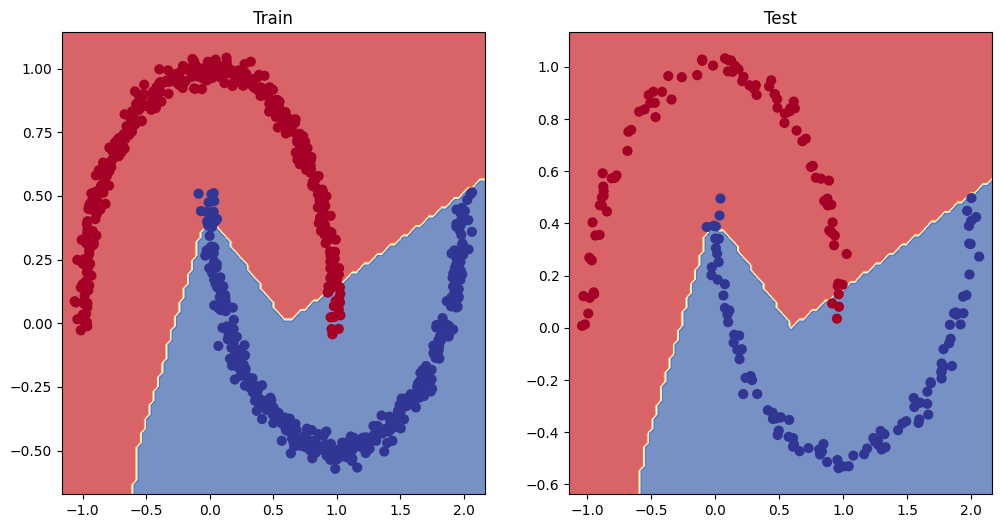

In [73]:
# Plot the decision boundary
plt.figure(figsize=(12,6));
plt.subplot(1,2,1);
plt.title("Train");
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test)

Text(0.5, 1.0, 'Model_5 loss curve')

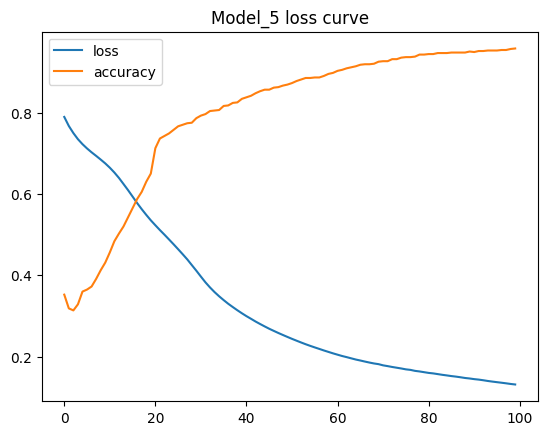

In [74]:
## Plot the loss curve for model 5
pd.DataFrame(history_5.history).plot()
plt.title("Model_5 loss curve")

In [75]:
# Finding the best learning rate
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Set the learning rate schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# Fit the model
history_6 = model_6.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=lr_schedular)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7477 - accuracy: 0.1625 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7446 - accuracy: 0.1725 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7412 - accuracy: 0.1688 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7374 - accuracy: 0.1700 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7335 - accuracy: 0.1700 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7293 - accuracy: 0.1675 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7247 - accuracy: 0.1700 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7199 - accuracy: 0.1612 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

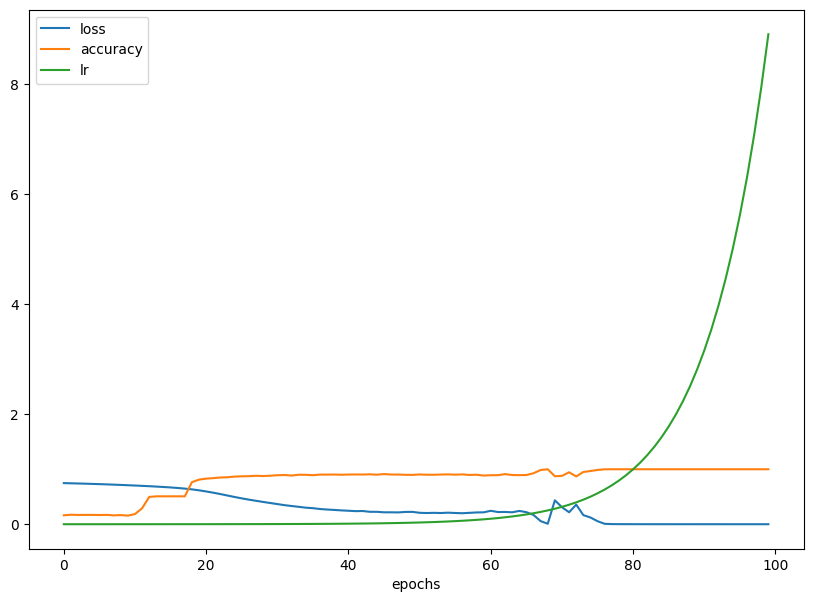

In [76]:
# Plot the learning rate
pd.DataFrame(history_6.history).plot(figsize=(10,7), xlabel="epochs");

## Comparing the model_3 with `elu` activation and `SDG()` optimizer and  model_6 with `relu` activation and `Adam()` optimizer

Text(0.5, 1.0, 'Model_6 with relu and Adam')

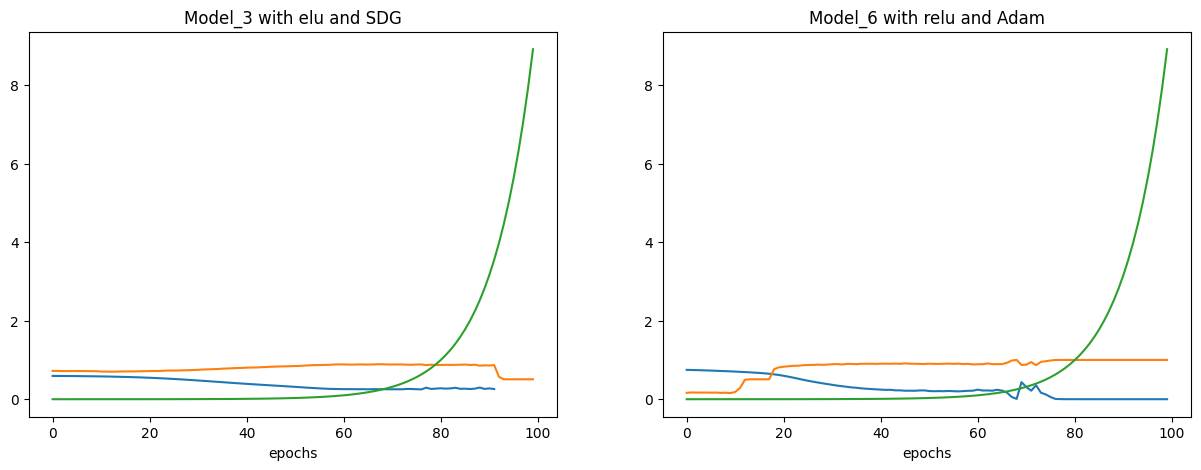

In [77]:
#plot to compare the different models
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(pd.DataFrame(history_3.history));
plt.xlabel("epochs")
plt.title("Model_3 with elu and SDG")
plt.subplot(1,2,2)
plt.plot(pd.DataFrame(history_6.history));
plt.xlabel("epochs")
plt.title("Model_6 with relu and Adam")

From the visualizations above. It is clear that the loss curve has a significant difference.

By using elu, the loss curve decreases steadily but shoots up suddenly as the learning rate increases . This is because elu is different from relu such that it calculate even teh negative values of a curve.

ELU
ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly until its output equal to −α
 whereas RELU sharply smoothes.

Pros

ELU becomes smooth slowly until its output equal to −α
 whereas RELU sharply smoothes.
ELU is a strong alternative to ReLU.
Unlike to ReLU, ELU can produce negative outputs.
Cons

For x>0
, it can blow up the activation with the output range of [0, inf].
ReLU
Pros

It avoids and rectifies vanishing gradient problem.
ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations.
Cons

One of its limitations is that it should only be used within hidden layers of a neural network model.
Some gradients can be fragile during training and can die. It can cause a weight update which will makes it never activate on any data point again. In other words, ReLu can result in dead neurons.
In another words, For activations in the region (x<0
) of ReLu, gradient will be 0 because of which the weights will not get adjusted during descent. That means, those neurons which go into that state will stop responding to variations in error/ input (simply because gradient is 0, nothing changes). This is called the dying ReLu problem.
The range of ReLu is [0,∞)
. This means it can blow up the activation.


*Learn more about Leaky ReLU*:

In [78]:
# Plotting the learning rate vs the loss
lrs_3 = 1e-4 * (10**tf.range(100)/20)
lrs_6 = 1e-4 * (10**tf.range(100)/20)

Text(0.5, 1.0, 'Model_6 Learnig rate vs Loss')

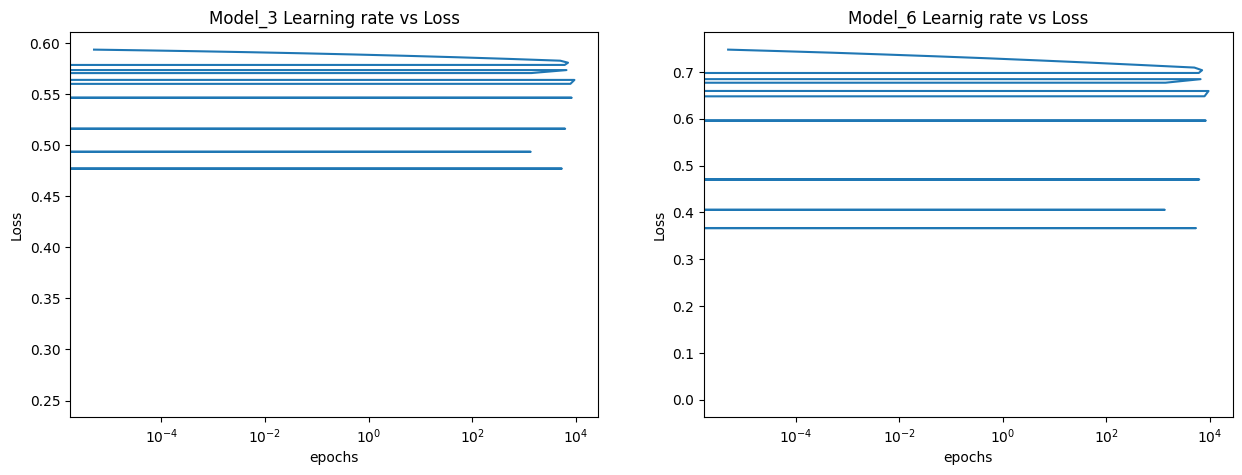

In [79]:
# Plot and compare the learnig rates
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.semilogx(lrs_3, history_3.history['loss'])
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Model_3 Learning rate vs Loss")
plt.subplot(1,2,2)
plt.semilogx(lrs_6, history_6.history['loss'])
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Model_6 Learnig rate vs Loss")

### Using a Confusion matrix

313/313 [==============================] - 0s 794us/step
doing binary classifcation...


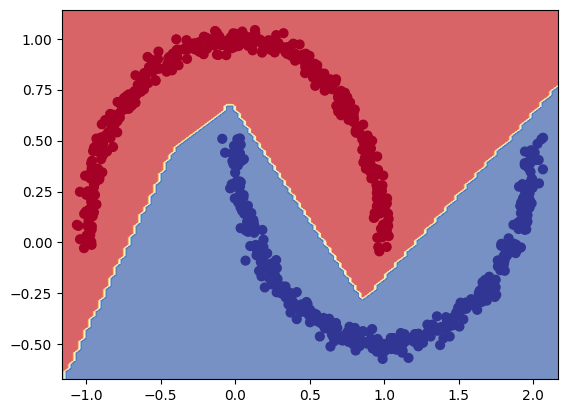

In [80]:
plot_decision_boundary(model_6, X_train, y_train)

313/313 [==============================] - 0s 917us/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


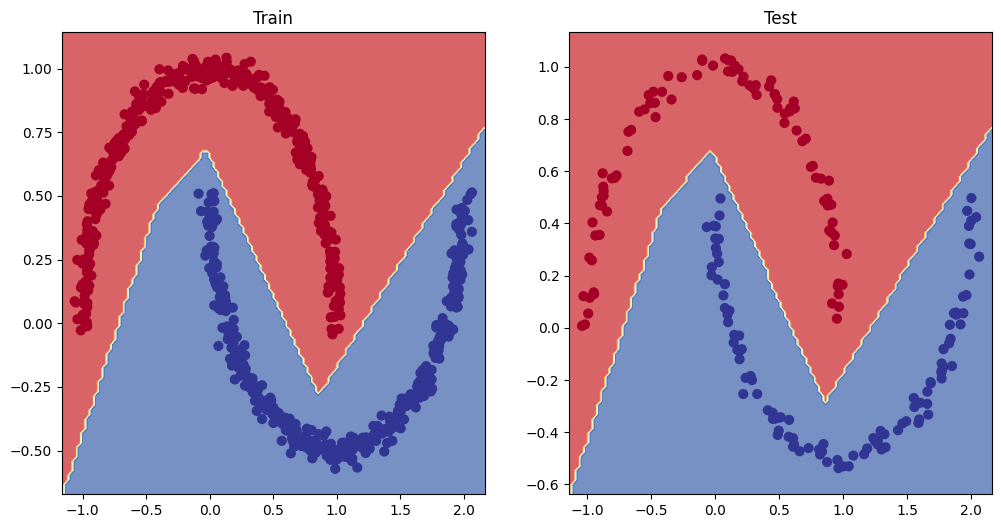

In [81]:
# Plot the decision boundary
plt.figure(figsize=(12,6));
plt.subplot(1,2,1);
plt.title("Train");
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)

Clearly , The `Adam` optimizer with `relu` activation yields the best results

In [82]:
y_preds = model_6.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [83]:
# Check y_preds
y_preds

array([[9.99936819e-01],
       [9.99936819e-01],
       [9.99936819e-01],
       [9.99936819e-01],
       [1.56499408e-18],
       [1.08350862e-14],
       [9.99936819e-01],
       [9.99936819e-01],
       [0.00000000e+00],
       [9.99936819e-01],
       [9.99936819e-01],
       [1.55958346e-32],
       [9.99936819e-01],
       [0.00000000e+00],
       [9.99936819e-01],
       [3.15839757e-33],
       [0.00000000e+00],
       [9.99936819e-01],
       [9.99936819e-01],
       [0.00000000e+00],
       [9.99936819e-01],
       [9.99936819e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.99936819e-01],
       [6.65560069e-14],
       [9.99697208e-01],
       [0.00000000e+00],
       [9.99936819e-01],
       [0.00000000e+00],
       [1.69122852e-38],
       [9.99936819e-01],
       [9.99936819e-01],
       [2.40261398e-28],
       [9.99936819e-01],
       [9.99936819e-01],
       [1.21721445e-20],
       [9.99936819e-01],
       [0.00000000e+00],
       [0.00000000e+00],


In [84]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [85]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [86]:
len(y_test), len(y_preds)

(200, 200)

In [87]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
print(cm)

[[ 94   0]
 [  0 106]]


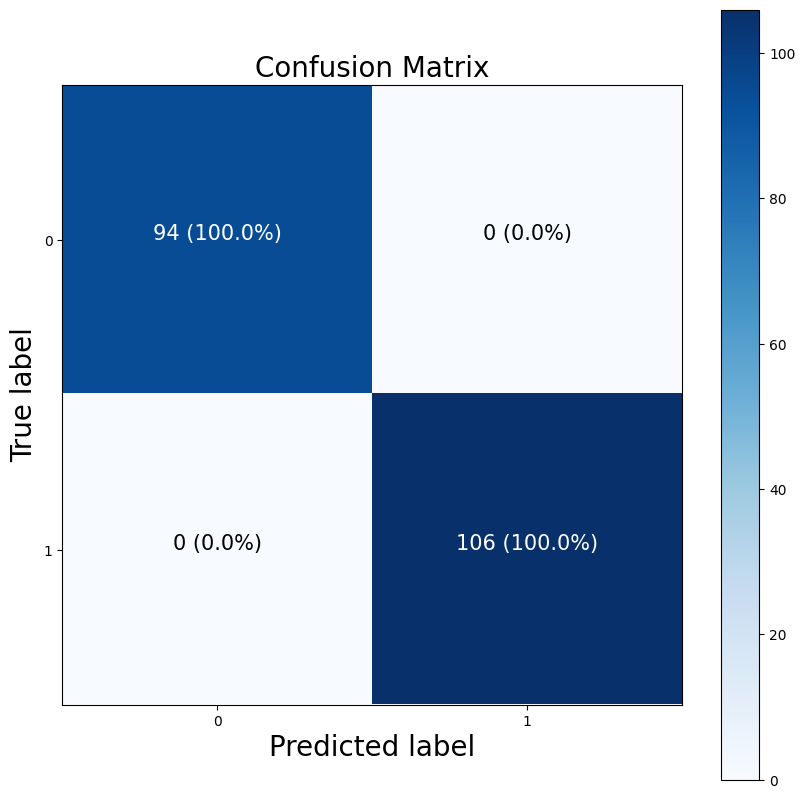

In [88]:
# Making the confusion matrix much prettier

# The following confusion matrix code is a remix of Scikit-Learn's
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

### **It seems like the model_6 made perfect predicitions on the test data. Perform more experiments with more complex nueral networks and hidden layers and also increase the noise on the make_moons dataset**

In [ ]:
# The next step from here is to do more experiments